In [357]:
import numpy as np
import pandas as pd

In [358]:
df = pd.read_csv('spam.csv')

In [359]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [360]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)


In [361]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [362]:
df.rename(columns={'v1':'Spam','v2':'Email'},inplace=True)
df.head()

,Spam,Email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [363]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [364]:
df['Spam'] = encoder.fit_transform(df['Spam'])
df.head()

,Spam,Email
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [365]:
df = df.drop_duplicates(keep='first')

In [366]:
df['Spam'].value_counts()

0    4516
1     653
Name: Spam, dtype: int64

In [12]:
import nltk

In [367]:
df['Characters lenght'] = df['Email'].apply(len)
df['Words lenght'] = df['Email'].apply(lambda x:len(nltk.word_tokenize(x)))
df['Sentences lenght'] = df['Email'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,Spam,Email,Characters lenght,Words lenght,Sentences lenght
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [396]:
emails = df.Email
emails

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Email, Length: 5169, dtype: object

In [397]:
cleanEmails  = emails.str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress', regex=True)

In [398]:
cleanEmails = cleanEmails.str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress', regex=True)

In [399]:
cleanEmails = cleanEmails.str.replace(r'£|\$','moneysymb', regex=True)

In [400]:
cleanEmails = cleanEmails.str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumbr', regex=True)

In [401]:
cleanEmails = cleanEmails.str.replace(r'\d+(\.\d+)?','number', regex=True)

In [402]:
cleanEmails = cleanEmails.str.replace(r'[^\w\d\s]',' ', regex=True)

In [403]:
cleanEmails = cleanEmails.str.replace(r'\s+',' ', regex=True)

In [404]:
cleanEmails = cleanEmails.str.replace(r'^\s+|\s\+?$','', regex=True)

In [405]:
cleanEmails = cleanEmails.str.lower()

In [406]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
import string

stop_words = set(stopwords.words('english'))
ps = nltk.PorterStemmer()


In [407]:
cleanEmails = cleanEmails.apply(lambda x : ' '.join(term for term in x.split() if term not in stop_words))

In [408]:
cleanEmails = cleanEmails.apply(lambda x : ' '.join(ps.stem(word) for word in x.split()))

In [409]:
cleanEmails

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri number wkli comp win fa cup final t...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    numbernd time tri number contact u u åmoneysym...
5568                             ì_ b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: Email, Length: 5169, dtype: object

In [418]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [419]:
x = cleanEmails
x = tfidf.fit_transform(x).toarray()
y = df.Spam.values

In [432]:

def classifier(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, shuffle=True)
    model.fit(x_train, y_train)
    return x_train, x_test, y_train, y_test

In [433]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

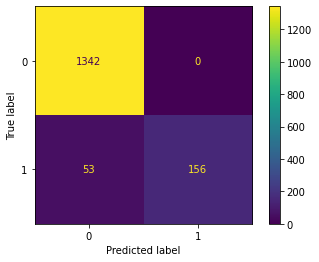

In [434]:
algos = ["K Nearest Neighbors",
         "Decision Tree", 
         "Random Forest", 
         "Logistic Regression",
         "Naive Bayes"]

classifiers = [KNeighborsClassifier(),
               DecisionTreeClassifier(),
               RandomForestClassifier(),
               LogisticRegression(),
               MultinomialNB()]

models = list(zip(algos, classifiers))

voted = VotingClassifier(estimators = models , voting = 'hard', n_jobs = -1)

x_train, x_test, y_train, y_test = classifier(voted, x, y)

predictions = voted.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=voted.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=voted.classes_)
disp.plot()
plt.show()

In [424]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(vote,open('model.pkl','wb'))